In [2]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront'
home_dir = os.path.expanduser(home_dir)

# tools_path = f'{home_dir}/code/processing/tools/tools.py'
# sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
# import tools as tools

# atish_assay_path =f'2%5%_FitnessMeasurement/code/fitness_assay_grantedits.py'
# sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
# import fitness_assay_grantedits as atish

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

%load_ext autoreload
%autoreload 2 

import pickle 

with open(f'{home_dir}/data/intermediate/preexisting_mutations.pkl', 'rb') as f:
    preexisting_mutations = pickle.load(f)


sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

In [3]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

In [4]:
merged_fitness['gene']

0        NaN
1       MKT1
2        NaN
3       PAB1
4       MKT1
        ... 
5019     NaN
5020     NaN
5022     NaN
5023     NaN
5024     NaN
Name: gene, Length: 4633, dtype: object

In [5]:
preexisting_mutations

{'IRA1_NON': ['II:522427:A:T:IRA1:stop_gained:c.4202T>A:p.Leu1401*',
  'VI:101127:T:A:LPD1:downstream_gene_variant:c.*501A>T:nan',
  'VII:1023358:C:A:YGR266W:missense_variant:c.703C>A:p.Gln235Lys',
  'VII:161471:G:C:ATG1:missense_variant:c.1407G>C:p.Leu469Phe',
  'XII:1029498:C:A:RPL6B:synonymous_variant:c.261C>A:p.Thr87Thr',
  'XIV:204739:G:A:KEX2:missense_variant:c.2312G>A:p.Ser771Asn',
  'XIV:218512:G:A:ELA1:synonymous_variant:c.151C>T:p.Leu51Leu',
  'XV:608680:G:T:SPP2:missense_variant:c.518C>A:p.Thr173Lys',
  'XV:818647:T:G:RPT4:upstream_gene_variant:c.-4939A>C:nan'],
 'IRA1_MIS': ['II:522697:G:A:IRA1:missense_variant:c.3932C>T:p.Ala1311Val',
  'V:177308:C:A:YER010C:upstream_gene_variant:c.-3970G>T:nan',
  'V:303524:AT:ATT:ALD5:upstream_gene_variant:c.-505_-504insT:nan',
  'XI:347074:C:T:YKL050C:upstream_gene_variant:c.-1454G>A:nan',
  'XV:87280:AT:A:MDH2:upstream_gene_variant:c.-4361delA:nan'],
 'CYR1': ['II:610499:A:T:MED8:upstream_gene_variant:c.-746T>A:nan',
  'X:427906:C:A:CY

In [6]:
merged_fitness['additional_muts']

0                                                     NaN
1       DOP1-NON_SYNONYMOUS_CODING; SMD2-NON_SYNONYMOU...
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
5019                                         NotSequenced
5020                                         NotSequenced
5022                                         NotSequenced
5023                                         NotSequenced
5024                                         NotSequenced
Name: additional_muts, Length: 4633, dtype: object

In [7]:
merged_fitness[(merged_fitness['ancestor']=='WT') & (merged_fitness['gene']=='other')]['additional_muts'].values

array(['BUR6-UPSTREAM',
       'YNL285W-NON_SYNONYMOUS_CODING; RRP12-SYNONYMOUS_CODING; TRS120-SYNONYMOUS_CODING',
       'YNL162W-A-DOWNSTREAM', 'YNL162W-A-DOWNSTREAM', nan, 'IX-Gain',
       'EXO70-SYNONYMOUS_CODING; WHI2-UPSTREAM; PUG1-DOWNSTREAM; BUR6-UPSTREAM',
       'nan-nan', 'CRP1-UPSTREAM; TRP5-UPSTREAM',
       'FRE7-NON_SYNONYMOUS_CODING; CWC27-NON_SYNONYMOUS_CODING; KEL3-NON_SYNONYMOUS_CODING; YOL075C-UPSTREAM',
       'ISD11-UPSTREAM', nan, 'YHM2-DOWNSTREAM', 'NotSequenced', nan,
       'LCB4-NON_SYNONYMOUS_CODING; CRP1-UPSTREAM',
       'GPB1-NON_SYNONYMOUS_CODING; YER097W-UPSTREAM',
       'YCR024C-B-FRAME_SHIFT; YCR024C-B-FRAME_SHIFT+STOP_GAINED; YAK1-NON_SYNONYMOUS_CODING; FSH2-NON_SYNONYMOUS_CODING; HEM2-SYNONYMOUS_CODING; BUR6-UPSTREAM',
       'IQG1-NON_SYNONYMOUS_CODING; SRO7-UPSTREAM; CRP1-UPSTREAM', nan,
       'GET2-NON_SYNONYMOUS_CODING', 'FLO8-UPSTREAM; RPS29A-UPSTREAM',
       'TDA8-NON_SYNONYMOUS_CODING; TDA8-NON_SYNONYMOUS_CODING; TDA8-SYNONYMOUS_CODING; T

In [8]:
# ancestor_list = [['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]

exclusion_list = ['NotSequenced','Diploid','other']
ancestor_list = ['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
ancestor_list = ['WT','TOR1','GPB2','CYR1','IRA1_MIS','IRA1_NON']
# ancestor_list = ['CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']
mutation_dictionary = {}

doubles_only_dictionary = {}

for a,anc in enumerate(ancestor_list):
    
    mutation_dictionary[anc] = {}
    doubles_only_dictionary[anc] = {}

    this_anc = merged_fitness[merged_fitness['ancestor'].isin([anc])]

    these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
    these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

    interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]

    for evo_cond in np.unique(this_anc['evolution_condition'].values):
#         for evo_cond in evo_cond_list:
        this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
    
        all_muts_here = []
        doubles = []
        
        for gene in this_data['gene'].values:
            if not p.isnull(gene):
                if '+' in gene:
                    for inner_gene in gene.split('+'):
                        if inner_gene.replace(' ','') not in exclusion_list:
                            all_muts_here.append(inner_gene.replace(' ',''))
                            doubles.append(inner_gene.replace(' ',''))
                    
                elif gene not in exclusion_list:
                    all_muts_here.append(gene)
        
        doubles_only_dictionary[anc][evo_cond] = []
        for (gene,count) in zip(*np.unique(doubles,return_counts=True)):
            if np.sum(np.isin(all_muts_here,gene)) == count:
                doubles_only_dictionary[anc][evo_cond].append(gene)
        
        mutation_dictionary[anc][evo_cond] = all_muts_here
                
mutation_dictionary['WT']['Evo3D'] = []            
        
        
# #         for entry in this_data['all_mutations'].values:
#             this_entry_mut_not_pre = []
#             if not p.isnull(entry):
#                 if ';' in entry:
#                     muts = entry.split(';')
#                     print(muts)
#                     for mut in muts:
#                         if '-' in mut:
#                             gene_effect = mut.strip(' ').split('-')
#                             print(gene_effect[0])
#                             if f'{gene_effect[0]}' in preexisting_mutations[anc]:
# #                                 print(f'{gene_effect} (pre-existing)')
#                                 print('')
#                             else:
#                                 this_entry_mut_not_pre.append(f'{gene_effect[0]}')
#                 else:
#                     muts = literal_eval(entry)

#                     for mut in muts:
#                         gene,effect,zyg = mut.split(':')
#                         if f'{gene}:{effect}' in preexisting_mutations_genes[anc]:
# #                             print(f'{gene}_{effect} (pre-existing)')
#                             print('')
#                         else:
# #                             this_entry_mut_not_pre.append(f'{gene}_{effect}')
#                             this_entry_mut_not_pre.append(f'{gene}')
#                 all_muts_here.append(this_entry_mut_not_pre)
#         mutation_dictionary[anc][evo_cond] = all_muts_here
        
       

In [9]:
doubles_only_dictionary

{'WT': {'Evo1D': ['MCM1', 'POX1'],
  'Evo1_5D': ['CYR1', 'MDN1', 'XI'],
  'Evo2D': ['Chr11Amp'],
  'Evo5D': ['CYR1', 'HOG1', 'IOC3', 'LSM2', 'MDN1', 'NOT3', 'POX1', 'SSM4']},
 'TOR1': {'Evo1D': [], 'Evo2D': [], 'Evo3D': []},
 'GPB2': {'Evo1D': [],
  'Evo2D': ['BMH1', 'GPB1'],
  'Evo3D': ['ATE1', 'EEB1', 'KSP1', 'PLB3', 'VPS53']},
 'CYR1': {'Evo1D': [], 'Evo2D': ['YPK9'], 'Evo3D': []},
 'IRA1_MIS': {'Evo1D': [],
  'Evo2D': ['ALD5', 'ATG26', 'VPS53', 'YPK9'],
  'Evo3D': ['IRA1', 'MKS1', 'SPB1', 'TFA1', 'VPS53']},
 'IRA1_NON': {'Evo1D': [],
  'Evo2D': ['GSH1', 'MAE1', 'TFA1', 'VPS53'],
  'Evo3D': ['ALD5', 'ATG26', 'PLB3', 'PUF3', 'TAN1']}}

In [10]:
gene_array = []


# for anc in ancestor_list:
#     for evo_cond in ['Evo1D','Evo2D','Evo3D']:
#         for mutant in mutation_dictionary[anc][evo_cond]:
#             unique_here = np.unique(mutant)
#             for gene in unique_here:
#                 gene_array.append([anc,evo_cond,gene])
                
                
for anc in ancestor_list:
    for evo_cond in ['Evo1D','Evo2D','Evo3D']:
        for gene in mutation_dictionary[anc][evo_cond]:
            gene_array.append([anc,evo_cond,gene])

In [11]:
gene_hits_df = p.DataFrame(gene_array,columns=['ancestor','evolution_condition','gene'])
gene_hits_df = gene_hits_df[gene_hits_df['evolution_condition'].isin(['Evo2D','Evo3D'])]

In [12]:
# pathways = {'TOR/Sch9':['KSP1'],
#             'HOG':['SSK2','PBS2'],
#             'RTG':['RTG2','ARO80','MKS1','GSH1'],
#             'TCA Cycle':['CIT1','YNR001W-A','KGD1','MDH1'],
#             'Ras/PKA':['GPB2','IRA1','IRA2'],
#             }

pathways = tools.gene_pathway_map

pathway_genes = []
for pathway,genes in pathways.items():
    
    for gene in genes:
        if gene in gene_hits_df['gene'].values:
            pathway_genes.append(gene)
    
    
#     pathway_genes = pathway_genes + genes

In [13]:
pathway_genes

['IRA1',
 'IRA2',
 'GPB1',
 'GPB2',
 'PDE2',
 'CYR1',
 'GPR1',
 'RAS2',
 'TFS1',
 'TOR1',
 'KOG1',
 'SCH9',
 'KSP1',
 'HOG1',
 'PBS2',
 'SSK2',
 'RTG2',
 'MKS1',
 'BMH1',
 'CIT1',
 'KGD1',
 'MDH1',
 'MAE1',
 'ALD5',
 'PAB1',
 'PAN2',
 'PAN3',
 'AIM17']

In [14]:
gene_hits_df.value_counts('gene').keys()

Index(['KSP1', 'PUF3', 'IRA1', 'PAB1', 'CIT1', 'RTG2', 'GPB2', 'MKT1', 'IRA2',
       'PDE2', 'MKS1', 'GSH1', 'ARO80', 'SSK2', 'PBS2', 'GPB1', 'MAE1', 'MDH1',
       'KGD1', 'VPS53', 'ALD5', 'TFA1', 'AIM17', 'CYR1', 'Chr11Amp', 'ATG26',
       'YPK9', 'PAN3', 'PLB3', 'PAN2', 'RAS2', 'MTH1', 'BMH1', 'GPR1', 'EEB1',
       'SCH9', 'SPB1', 'TAN1', 'HOG1', 'TFS1', 'TOR1', 'ATE1', 'KOG1'],
      dtype='object', name='gene')

In [15]:
evo_cond_list = ['Evo1D','Evo2D','Evo3D']
evo_cond_list = ['Evo2D','Evo3D']

# all_genes_sorted = [gene for gene,count in gene_hits_df.value_counts('gene').items()]
# all_genes_counts = [count for gene,count in gene_hits_df.value_counts('gene').items()]

all_genes_sorted = pathway_genes + [gene for gene in gene_hits_df.value_counts('gene').keys() if gene not in pathway_genes]

# all_genes_sorted.remove('MTH1')
# all_genes_sorted.insert(np.where(np.isin(all_genes_sorted,'MIT1'))[0]+1,'MTH1')

all_genes_counts = [gene_hits_df.value_counts('gene')[gene] for gene in all_genes_sorted]
# for gene,count in gene_hits_df.value_counts('gene').items():

count_matrix = np.zeros((len(ancestor_list)*len(evo_cond_list)+1,len(all_genes_sorted )))
count_matrix[0,:] = all_genes_counts


for a,anc in enumerate(ancestor_list):
    for e,evo_cond in enumerate(evo_cond_list):
        these_samples = gene_hits_df[(gene_hits_df['ancestor']==anc) & (gene_hits_df['evolution_condition']==evo_cond)]
#         for g,(gene,count) in enumerate(gene_hits_df.value_counts('gene').items()):
#             count_matrix[(a)*len(evo_cond_list)+e+1,g] = len(these_samples[these_samples['gene']==gene])
        for g,gene in enumerate(all_genes_sorted):
            count_matrix[(a)*len(evo_cond_list)+e+1,g] = len(these_samples[these_samples['gene']==gene])
        


In [16]:
gene_mutation_types = {}

for gene in all_genes_sorted:
    mutation_effects = merged_fitness[merged_fitness['gene']==gene]['effect'].values
    mutation_types = merged_fitness[merged_fitness['gene']==gene]['type'].values
    
    mutation_effects = list(mutation_effects) + list(mutation_types)
    
    called_effect = 'modification_of_function'
#     print(gene,mutation_effects)
    
    for effect in mutation_effects:
        if ('stop' in str(effect)) or ('frameshift' in str(effect)):
            called_effect = 'loss_of_function'
            
    gene_mutation_types[gene] = called_effect
    
    

In [17]:
gene_mutation_types['CIT1'] = 'modification_of_function' # mutation called as double frameshift is actually missense

In [18]:
gene_mutation_types

{'IRA1': 'loss_of_function',
 'IRA2': 'loss_of_function',
 'GPB1': 'modification_of_function',
 'GPB2': 'loss_of_function',
 'PDE2': 'loss_of_function',
 'CYR1': 'modification_of_function',
 'GPR1': 'modification_of_function',
 'RAS2': 'modification_of_function',
 'TFS1': 'modification_of_function',
 'TOR1': 'modification_of_function',
 'KOG1': 'modification_of_function',
 'SCH9': 'modification_of_function',
 'KSP1': 'loss_of_function',
 'HOG1': 'modification_of_function',
 'PBS2': 'modification_of_function',
 'SSK2': 'loss_of_function',
 'RTG2': 'modification_of_function',
 'MKS1': 'loss_of_function',
 'BMH1': 'modification_of_function',
 'CIT1': 'modification_of_function',
 'KGD1': 'modification_of_function',
 'MDH1': 'modification_of_function',
 'MAE1': 'modification_of_function',
 'ALD5': 'modification_of_function',
 'PAB1': 'modification_of_function',
 'PAN2': 'modification_of_function',
 'PAN3': 'loss_of_function',
 'AIM17': 'loss_of_function',
 'PUF3': 'loss_of_function',
 'MKT1

Ras/PKA
Pathway 4.0
TOR/Sch9
Pathway 10.5
HOG
Pathway 14.0
RTG
Pathway 17.0
TCA
cycle 21.0
Regulation of
Mitochondrial
Biogenesis 26.0
Other 30.0


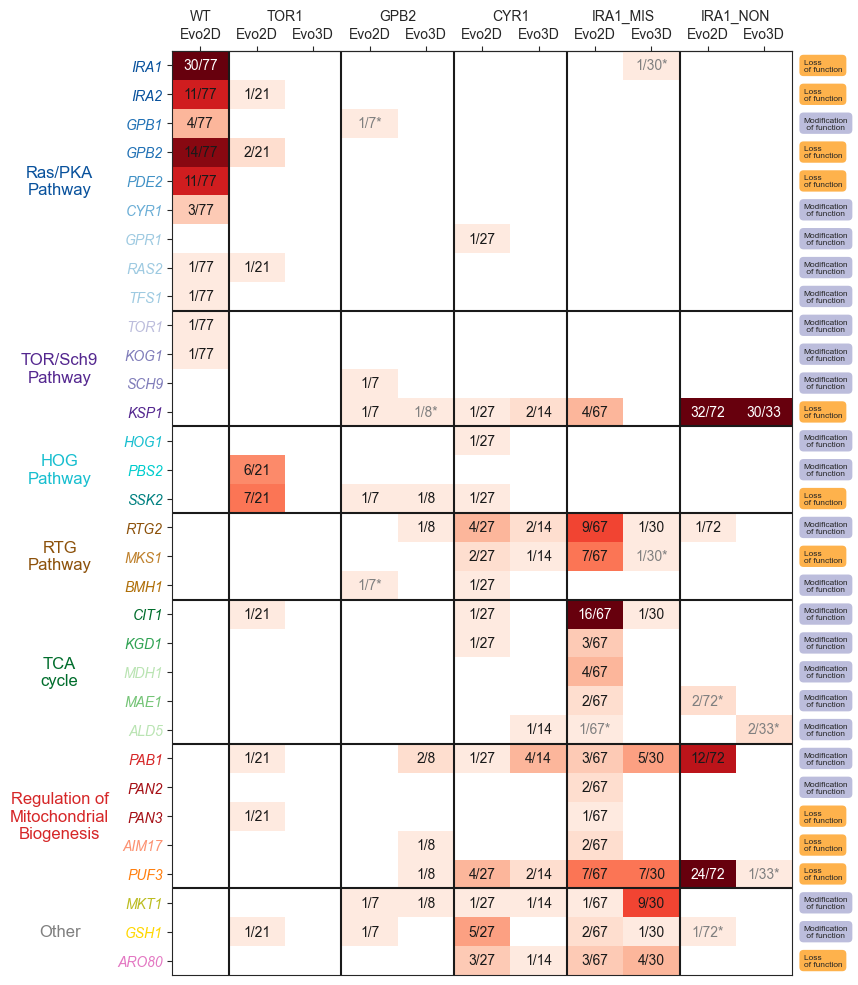

In [59]:
cutoff_loc = -1

# cutoff_count = 1
# cutoff_loc = np.where(np.asarray(all_genes_counts)<cutoff_count)[0][0]
cutoff_loc = -11

# evo_cond_list = ['Evo2D','Evo3D']


# freq_matrix = count_matrix[1:,:cutoff_loc]/np.repeat(np.sum(count_matrix[1:,:cutoff_loc],axis=1),count_matrix[1:,:cutoff_loc].shape[1]).reshape(count_matrix[1:,:cutoff_loc].shape)

count_matrix[count_matrix==0] = np.nan

# plt.figure(figsize=(20,30))

matrix_no_wt3d = np.insert(count_matrix[3:,:cutoff_loc],0,count_matrix[1,:cutoff_loc],axis=0)


plt.figure(figsize=(8,12))
plt.pcolormesh(matrix_no_wt3d.swapaxes(0,1),cmap='Reds',vmin=0,vmax=15)
# plt.pcolormesh(freq_matrix.swapaxes(0,1),cmap='Reds',vmin=0,vmax=1)
# plt.colorbar()

plt.yticks([x+0.5 for x in range(len(all_genes_sorted[:cutoff_loc]))],[gene for gene in list(all_genes_sorted[:cutoff_loc])],style='italic')

for g,gene in enumerate(all_genes_sorted[:cutoff_loc]):
    plt.gca().get_yticklabels()[g].set_color(tools.find_mutation_color(gene))

# plt.xticks([x+0.5 for x in range((len(ancestor_list)*len(evo_cond_list)))],
#            [f"{anc}\n{evo_cond}" if evo_cond == 'Evo2D' else f"\n{evo_cond}" for anc in ancestor_list for evo_cond in evo_cond_list])

plt.xticks([x+0.5 for x in range(1+((len(ancestor_list)-1)*len(evo_cond_list)))],
           [f"{evo_cond}" for anc in ancestor_list for evo_cond in evo_cond_list 
            if not (anc == 'WT' and evo_cond == 'Evo3D')])

secax = plt.gca().secondary_xaxis('top')
secax.set_xticks([x*len(evo_cond_list) if x != 0 else x*len(evo_cond_list)+0.5 for x in range((len(ancestor_list)))],
                 [f"{anc}" for anc in ancestor_list]
                )  
secax.tick_params(length=0,pad=20)

# ancestor_list = ['WT','TOR1','GPB2','CYR1','IRA1_MIS','IRA1_NON']

for a,anc in enumerate(ancestor_list):
    for e,evo_cond in enumerate(evo_cond_list):
        for g,gene in enumerate(all_genes_sorted[:cutoff_loc]):
            text_color='k'
            
            if a == 0:
                this_entry = (a)*len(evo_cond_list)+e+1
                offset = 0
            else:
                this_entry = (a)*len(evo_cond_list)+e+1
                offset = -1
#             print(this_entry)
            
            if count_matrix[this_entry,g] > 15:
                text_color = 'w'
            if  count_matrix[this_entry,g] > 0:
                if gene in doubles_only_dictionary[anc][evo_cond]:
                    plt.text(x=this_entry-0.5+offset,y=g+0.5,s=f'{int(count_matrix[this_entry,g])}/{int(np.nansum(count_matrix[this_entry,:cutoff_loc]))}*',ha='center',va='center',color='gray')
                else:
                    plt.text(x=this_entry-0.5+offset,y=g+0.5,s=f'{int(count_matrix[this_entry,g])}/{int(np.nansum(count_matrix[this_entry,:cutoff_loc]))}',ha='center',va='center',color=text_color)

for a in range(len(ancestor_list)-1):
    if a == 0:
        plt.axvline(a+1,color='k')
    else:
        plt.axvline((a)*len(evo_cond_list)+1,color='k')
        
for g,gene in enumerate(all_genes_sorted[:cutoff_loc]):
    if gene_mutation_types[gene] == 'loss_of_function':
        plt.annotate(text=('Loss \nof function'),xy=(11,g+0.5),xytext=(11.2,g+0.5),ha='left',va='center',fontsize=6,
                    bbox=dict(facecolor='#feb24c', edgecolor='None', boxstyle='round,pad=0.5'))
    else:
        plt.annotate(text=('Modification\n of function'),xy=(11,g+0.5),xytext=(11.2,g+0.5),ha='left',va='center',fontsize=6,
                    bbox=dict(facecolor='#bcbddc', edgecolor='None', boxstyle='round,pad=0.5'))
        
pathways = [tools.pathway_gene_map[gene] for gene in all_genes_sorted[:cutoff_loc]]

pathway_names = ['Ras/PKA\nPathway','TOR/Sch9\nPathway','HOG\nPathway',
                 'RTG\nPathway','TCA\ncycle','Regulation of\nMitochondrial\nBiogenesis','Other']

for p,pathway in enumerate(['Ras/PKA','TOR/Sch9','HOG','RTG','TCA cycle','Deadenylation/Mitochondial Function','Other']):
    ix = np.where(np.isin(pathways,pathway))[0]
    if pathway != 'Other':
        plt.axhline(y=ix[-1]+1,color='k')
        
    print(pathway_names[p],np.mean(ix))
        
    plt.annotate(text=(pathway_names[p]),xy=(-2,np.mean(ix)+0.5),xytext=(-2,np.mean(ix)+0.5),
                 ha='center',va='center',fontsize=12,color=tools.pathway_color_map[pathway],annotation_clip=False)
        

    
    
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
# plt.tight_layout()
# plt.savefig(f'{home_dir}/figures/analysis/mutations/mutation_table_by_condition.pdf',bbox_inches='tight')
plt.savefig(f'{home_dir}/figures/analysis/mutations/mutation_table_by_condition_cutoff{cutoff_loc}_withWT.pdf',bbox_inches='tight')
# plt.savefig(f'plots/WGS_GeneHits_Matrix_byAncestor+EvoCond_byPathway_fraction_cutoff{cutoff_count}.pdf',bbox_inches='tight')

In [43]:
np.mean(ix)

30.0

In [32]:
pathways

['Ras/PKA',
 'Ras/PKA',
 'Ras/PKA',
 'Ras/PKA',
 'Ras/PKA',
 'Ras/PKA',
 'Ras/PKA',
 'Ras/PKA',
 'Ras/PKA',
 'TOR/Sch9',
 'TOR/Sch9',
 'TOR/Sch9',
 'TOR/Sch9',
 'HOG',
 'HOG',
 'HOG',
 'RTG',
 'RTG',
 'RTG',
 'TCA cycle',
 'TCA cycle',
 'TCA cycle',
 'TCA cycle',
 'TCA cycle',
 'Deadenylation/Mitochondial Function',
 'Deadenylation/Mitochondial Function',
 'Deadenylation/Mitochondial Function',
 'Deadenylation/Mitochondial Function',
 'Deadenylation/Mitochondial Function',
 'Other',
 'Other',
 'Other']

In [20]:
# count_matrix.swapaxes(0,1).shape


pathway_order = ['Ras/PKA','TOR/Sch9','HOG','RTG','TCA cycle','Deadenylation/Mitochondial Function','Other']

pathway_matrix = np.zeros(shape=(matrix_no_wt3d.shape[0],len(pathway_order)))
pathway_matrix = np.zeros(shape=(len(pathway_order),matrix_no_wt3d.shape[0]))

gene_swapped = matrix_no_wt3d.swapaxes(0,1)
gene_swapped = np.nan_to_num(gene_swapped)

for g,gene in enumerate(all_genes_sorted[:cutoff_loc]):
    
    if gene in tools.pathway_gene_map:
        pathway = tools.pathway_gene_map[gene]
        p = np.where(np.isin(pathway_order,pathway))[0][0]
        
    else:
        p = np.where(np.isin(pathway_order,'Other'))[0][0]
    
#     p = np.where(pathway_order )
    print(g,p,gene)
    
    pathway_matrix[p,:] += gene_swapped[g,:]

0 0 IRA1
1 0 IRA2
2 0 GPB1
3 0 GPB2
4 0 PDE2
5 0 CYR1
6 0 GPR1
7 0 RAS2
8 0 TFS1
9 1 TOR1
10 1 KOG1
11 1 SCH9
12 1 KSP1
13 2 HOG1
14 2 PBS2
15 2 SSK2
16 3 RTG2
17 3 MKS1
18 3 BMH1
19 4 CIT1
20 4 KGD1
21 4 MDH1
22 4 MAE1
23 4 ALD5
24 5 PAB1
25 5 PAN2
26 5 PAN3
27 5 AIM17
28 6 PUF3
29 6 MKT1
30 6 GSH1
31 6 ARO80


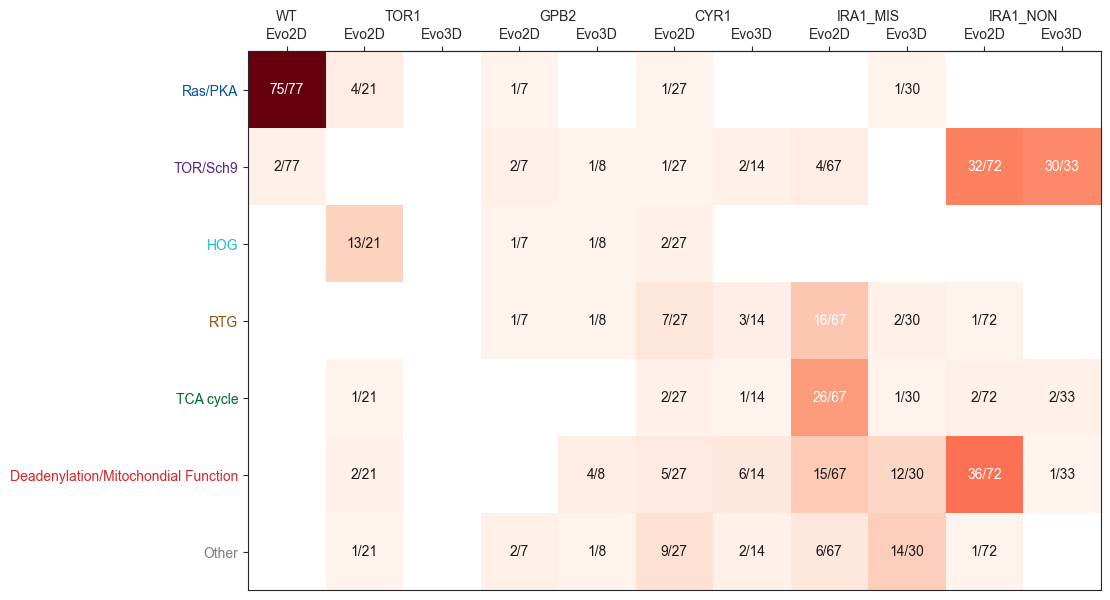

In [101]:
pathway_matrix[pathway_matrix==0] = np.nan

plt.figure(figsize=(11,7))

plt.pcolormesh(pathway_matrix,cmap='Reds',vmin=0,vmax=75)

plt.yticks([x+0.5 for x in range(len(pathway_order))],pathway_order)

for p,pathway in enumerate(pathway_order):
    plt.gca().get_yticklabels()[p].set_color(tools.pathway_color_map[pathway])

plt.xticks([x+0.5 for x in range(1+((len(ancestor_list)-1)*len(evo_cond_list)))],
           [f"{evo_cond}" for anc in ancestor_list for evo_cond in evo_cond_list 
            if not (anc == 'WT' and evo_cond == 'Evo3D')])

secax = plt.gca().secondary_xaxis('top')
secax.set_xticks([x*len(evo_cond_list) if x != 0 else x*len(evo_cond_list)+0.5 for x in range((len(ancestor_list)))],
                 [f"{anc}" for anc in ancestor_list]
                )  
secax.tick_params(length=0,pad=20)

pathway_matrix = np.nan_to_num(pathway_matrix)

for entry in range(pathway_matrix.shape[1]):
    for p,pathway in enumerate(pathway_order):
            text_color='k'
            offset = 1
            
            if pathway_matrix[p,entry] > 15:
                text_color = 'w'
            if  pathway_matrix[p,entry] > 0:
                plt.text(x=entry-0.5+offset,y=p+0.5,
                         s=f'{pathway_matrix[p,entry]:.0f}/{np.nansum(pathway_matrix[:,entry]):.0f}',
                         ha='center',va='center',color=text_color)


plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

In [97]:
pathway_matrix

array([[75.,  4.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 2.,  0.,  0.,  2.,  1.,  1.,  2.,  4.,  0., 32., 30.],
       [ 0., 13.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  7.,  3., 16.,  2.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  2.,  1., 26.,  1.,  2.,  2.],
       [ 0.,  2.,  0.,  0.,  4.,  5.,  6., 15., 12., 36.,  1.],
       [ 0.,  1.,  0.,  2.,  1.,  9.,  2.,  6., 14.,  1.,  0.]])

In [82]:
pathway_matrix.shape[1]

11

In [86]:
int(pathway_matrix[p,entry])

75

In [88]:
int(np.nansum(pathway_matrix[:,entry]))

77

In [91]:
int(np.nansum(pathway_matrix[:,entry]))

77

In [95]:
pathway_matrix

array([[75.,  4., nan,  1., nan,  1., nan, nan,  1., nan, nan],
       [ 2., nan, nan,  2.,  1.,  1.,  2.,  4., nan, 32., 30.],
       [nan, 13., nan,  1.,  1.,  2., nan, nan, nan, nan, nan],
       [nan, nan, nan,  1.,  1.,  7.,  3., 16.,  2.,  1., nan],
       [nan,  1., nan, nan, nan,  2.,  1., 26.,  1.,  2.,  2.],
       [nan,  2., nan, nan,  4.,  5.,  6., 15., 12., 36.,  1.],
       [nan,  1., nan,  2.,  1.,  9.,  2.,  6., 14.,  1., nan]])